## Prediction of getting heart disease using logistic regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns

In [2]:
data = pd.read_csv(r"C:\Users\user\Documents\Projects ML\Logistic regression to predict heart disease\framingham.csv")

In [3]:
data.head(12)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,2.0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,1.0,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1.0,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


<AxesSubplot:xlabel='prevalentStroke', ylabel='count'>

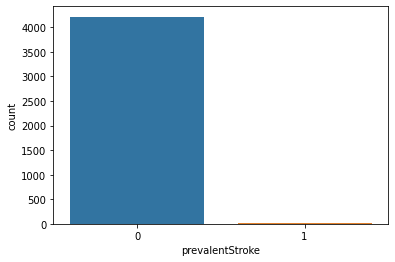

In [4]:
#Plotting the graph
sns.countplot(x = 'prevalentStroke',data=data)

<AxesSubplot:xlabel='prevalentHyp', ylabel='count'>

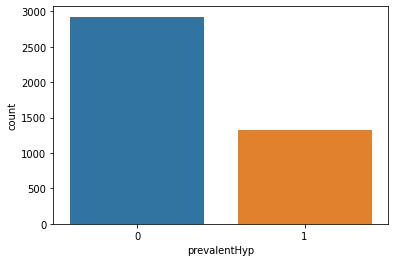

In [5]:
sns.countplot(x='prevalentHyp',data=data) #hyp = hypertension

<AxesSubplot:ylabel='Frequency'>

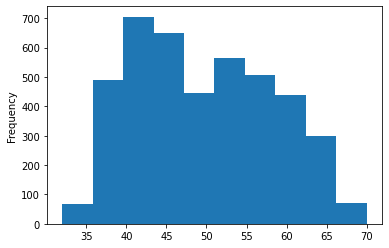

In [6]:
data['age'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

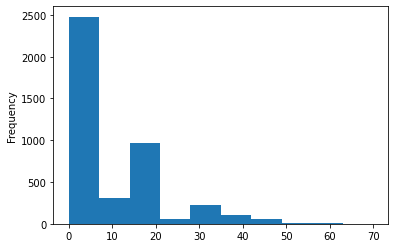

In [7]:
data['cigsPerDay'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

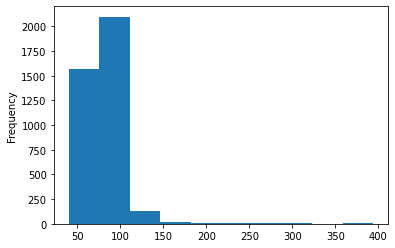

In [8]:
data['glucose'].plot.hist()

<AxesSubplot:xlabel='TenYearCHD', ylabel='count'>

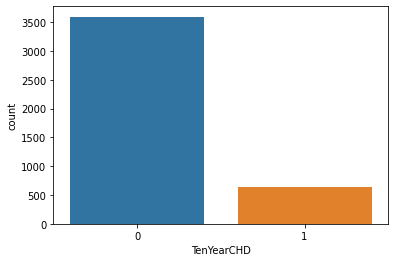

In [9]:
sns.countplot(x='TenYearCHD',data=data)

# finding the null values

In [10]:
data.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

<AxesSubplot:>

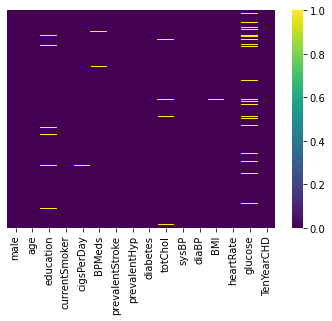

In [11]:
sns.heatmap(data.isnull(),yticklabels=False,cmap='viridis')

In [12]:
#Dropping the values
data.drop("education",axis=1,inplace=True)
data.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [13]:
m = np.mean(data['glucose'])
print(m)

81.96365524402907


In [14]:
#Replacing the NULL values
data['glucose'].replace(to_replace=np.nan,value=m,inplace=True)
data['BMI'].replace(to_replace=np.nan,value=m,inplace=True)
data['cigsPerDay'].replace(to_replace=np.nan,value=m,inplace=True)
data['heartRate'].replace(to_replace=np.nan,value=m,inplace=True)
data.drop("currentSmoker",axis=1,inplace=True)

<AxesSubplot:ylabel='Frequency'>

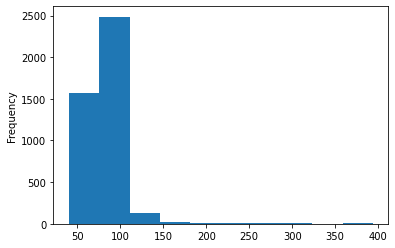

In [15]:
data['glucose'].plot.hist()

In [16]:
data.head(10)

,male,age,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


In [17]:
data['totChol'].replace(to_replace=np.nan,value=m,inplace=True)
data['BPMeds'].replace(to_replace=np.nan,value=m,inplace=True)

In [18]:
data.isnull().sum()

male               0
age                0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

# Train and Test

In [19]:
x = data.drop("TenYearCHD",axis=1)
y = data['TenYearCHD'].values 

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [23]:
X_train.shape

(3392, 13)

In [25]:
X_test.shape

(848, 13)

In [27]:
Y_train.shape

(3392,)

In [28]:
Y_test.shape

(848,)

In [41]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,Y_train)
Y_pred = lr.predict(X_test)


c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [43]:
Y_pred.shape

(848,)

In [46]:
#We find how good or bad our prediction is by using confusion matrix in Sqweed data 
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test,Y_pred)


array([[718,   4],
       [122,   4]], dtype=int64)

In [47]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test,Y_pred)
accuracy


0.8514150943396226

In [49]:
#To calculate precision 
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.85      0.99      0.92       722
           1       0.50      0.03      0.06       126

    accuracy                           0.85       848
   macro avg       0.68      0.51      0.49       848
weighted avg       0.80      0.85      0.79       848



In [51]:
#We can also use other algos like Decision tree, Random forest, etc and
#check which algo gives us better accuracy. But we will do it later